In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X = ndf[['cylinders', 'horsepower', 'weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


C:\Users\user\AppData\Local\Temp\ipykernel_392484\395628659.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace('?', np.nan, inplace=True)


In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

r_squre = lr.score(X_test, y_test)  
print(r_squre)
print('\n')

print('X 변수의 계수 a: ', lr.coef_)
print('\n')

print('상수항 b', lr.intercept_)

0.6939048496695599


X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.414351269634025


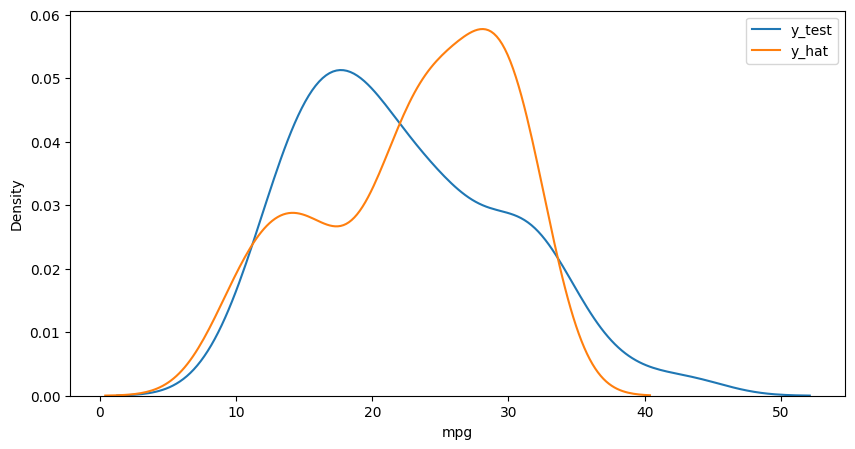

In [5]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [25]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

rdf = df.drop(['deck', 'embark_town'], axis=1)
# print(rdf.columns.values)

rdf = rdf.dropna(subset=['age'], how='any', axis=0)
# print(len(rdf))

most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
# print(most_freq)

# print(rdf.describe(include='all'))

rdf['embarked'].fillna(most_freq, inplace=True)
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()


C:\Users\user\AppData\Local\Temp\ipykernel_392484\3699106757.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rdf['embarked'].fillna(most_freq, inplace=True)


,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [26]:

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female   male  town_C  town_Q  town_S
0         0       3  22.0      1      0   False   True   False   False    True
1         1       1  38.0      1      0    True  False    True   False   False
2         1       3  26.0      0      0    True  False   False   False    True
3         1       1  35.0      1      0    True  False   False   False    True
4         0       3  35.0      0      0   False   True   False   False    True


In [27]:
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 
         'town_Q', 'town_S']]
y = ndf['survived']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)   
print('test data 개수: ', X_test.shape) 

train data 개수:  (499, 9)
test data 개수:  (215, 9)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [31]:
from sklearn import metrics

knn_matrix = metrics.confusion_matrix(y_test, y_hat)
# print(knn_matrix)

knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       125
           1       0.81      0.71      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



In [32]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

pd.set_option('display.max_columns', 15)    

rdf = df.drop(['deck', 'embark_town'], axis=1)

rdf = rdf.dropna(subset=['age'], how='any', axis=0)

most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)  

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C',
         'town_Q', 'town_S']]

y = ndf['survived']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train test 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)


train test 개수:  (499, 9)
test data 개수:  (215, 9)


C:\Users\user\AppData\Local\Temp\ipykernel_392484\2571467871.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rdf['embarked'].fillna(most_freq, inplace=True)


In [33]:
from sklearn import svm 

svm_model = svm.SVC(kernel='rbf')

svm_model.fit(X_train, y_train)

y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [34]:
from sklearn import metrics

svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print('\n')

svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



In [35]:
import pandas as pd
import numpy as np

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei',
              'chromatin', 'normal_nucleoli', 'mitoses', 'class']

pd.set_option('display.max_columns', 15)

print(df.head())

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


In [38]:
print(df['bare_nuclei'].unique())
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset='bare_nuclei', axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())

[ 1 10  2  4  3  9  7  5  8  6]


                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.000000     1.00

C:\Users\user\AppData\Local\Temp\ipykernel_392484\2456247388.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bare_nuclei'].replace('?', np.nan, inplace=True)


In [39]:
X = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']]
y = df['class']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)   

print('train data 개수: ', X_train.shape)   
print('test data 개수: ', X_test.shape)

train data 개수:  (478, 9)
test data 개수:  (205, 9)


In [40]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

tree_model.fit(X_train, y_train)    

y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [41]:
from sklearn import metrics

tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('\n')

tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

